## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
joint_path = study_results.merge(right = mouse_metadata, how = "left", on= ['Mouse ID', 'Mouse ID'])

# Display the data table for preview

#DataFrame.duplicated(subset=None, keep='first')
print(joint_path.head(10))




  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   
5     h246          0                45.0                 0     Ketapril   
6     p189          0                45.0                 0     Ketapril   
7     n923          0                45.0                 0     Ketapril   
8     q119          0                45.0                 0     Ketapril   
9     f993          0                45.0                 0     Naftisol   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          

In [2]:
# Checking the number of mice.
mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#DataFrame.duplicated(subset=None, keep='first')
duplicatedResults = joint_path.duplicated(subset=["Mouse ID", "Timepoint"])

#pass the result of the duplicated function to join_path with square brackets - filtering only duplicates
joint_path[duplicatedResults]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
#DataFrame.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
mouse_clean_data =joint_path.drop_duplicates(subset = ["Mouse ID", "Timepoint"])
print(mouse_clean_data.head(5))

  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25  


In [6]:
#number of mice
joint_path["Mouse ID"].nunique()

249

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
rowFilter = joint_path['Mouse ID'] == 'g989'

joint_path.loc[rowFilter, :]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#Don't know what data is correct, so don't bias data set, drop the mouse
mask = joint_path["Mouse ID"] != "g989"
joint_path_clean = joint_path[mask].reset_index(drop=True)
joint_path_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


In [9]:
joint_path_clean.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,19.606383,50.435293,1.025000,12.757979,25.660106
std,14.094238,8.914197,1.139971,7.181998,3.935064
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.933454,1.000000,13.000000,27.000000
75%,30.000000,56.324075,2.000000,19.250000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [10]:
# Checking the number of mice in the clean DataFrame.
joint_path_clean["Mouse ID"].nunique()


248

In [11]:
joint_path_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_groups = joint_path_clean.groupby("Drug Regimen")

avg_tumor = drug_groups["Tumor Volume (mm3)"].mean()
med_tumor = drug_groups["Tumor Volume (mm3)"].median()
mod_tumor = drug_groups["Tumor Volume (mm3)"].var()
std_tumor = drug_groups["Tumor Volume (mm3)"].std()
sem_tumor = drug_groups["Tumor Volume (mm3)"].sem()

summTable = pd.DataFrame()
summTable["Mean Tumor Volume"] = avg_tumor 
summTable["Median of Tumor Volume"] = med_tumor
summTable["Mode of Tumor Volume"] = mod_tumor
summTable["Std. Deviation of Tumor Volume"] = std_tumor
summTable["Std. Error of Tumor Volume"] = sem_tumor

summTable

,Mean Tumor Volume,Median of Tumor Volume,Mode of Tumor Volume,Std. Deviation of Tumor Volume,Std. Error of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
joint_path_clean.groupby("Drug Regimen").size()


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
dtype: int64

In [14]:
drug_groups["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [15]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drug_groups["Mouse ID"].nunique()


Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

In [16]:
drug_groups.size().values

array([230, 178, 178, 188, 186, 181, 148, 228, 181, 182], dtype=int64)

findfont: Font family ['Apple Braille'] not found. Falling back to DejaVu Sans.


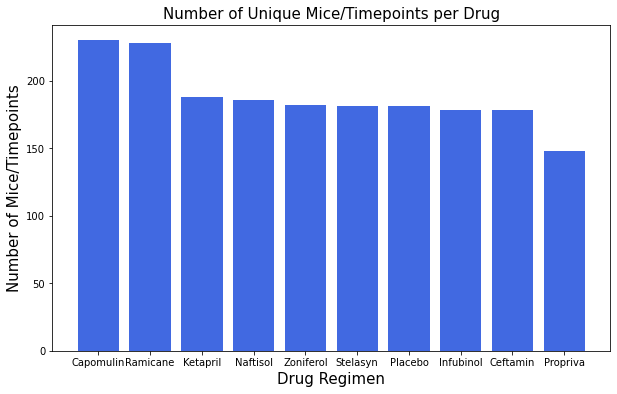

In [17]:
data = joint_path_clean["Drug Regimen"].value_counts()

x = data.index
y = data.values

plt.figure(figsize=(10,6))
plt.bar(x, y, color="royalblue")

plt.title("Number of Unique Mice/Timepoints per Drug", fontsize = 15, fontname = "Apple Braille")
plt.xlabel("Drug Regimen", fontsize = 15, fontname = "Apple Braille")
plt.ylabel("Number of Mice/Timepoints", fontsize = 15, fontname = "Apple Braille" )

plt.show()

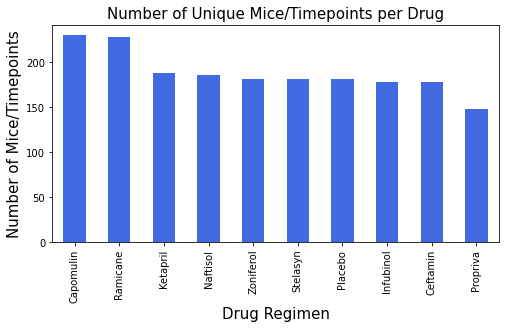

In [18]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.figure(figsize=(8,4))

joint_path_clean["Drug Regimen"].value_counts().plot(kind = "bar", color = "royalblue")

plt.title("Number of Unique Mice/Timepoints per Drug", fontsize = 15, fontname = "Apple Braille")
plt.xlabel("Drug Regimen", fontsize = 15, fontname = "Apple Braille")
plt.ylabel("Number of Mice/Timepoints", fontsize = 15, fontname = "Apple Braille" )

plt.show()



In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
joint_path_clean.groupby("Sex")["Mouse ID"].count()


Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

In [20]:
joint_path_clean.groupby(["Sex", "Mouse ID"]).size().reset_index().Sex.value_counts()

Male      125
Female    123
Name: Sex, dtype: int64

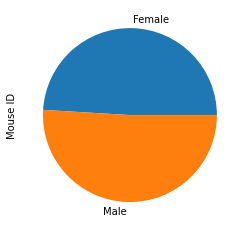

In [21]:
joint_path_clean.groupby("Sex")["Mouse ID"].count().plot(kind="pie")

In [22]:
joint_path_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [23]:
joint_path_clean.groupby("Sex").count()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Age_months,Weight (g)
Sex,,,,,,,
Female,922,922,922,922,922,922,922
Male,958,958,958,958,958,958,958


In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_data = joint_path_clean.groupby("Sex")["Mouse ID"].count()
gender_data



Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

In [25]:
list(gender_data.index)

['Female', 'Male']

<function matplotlib.pyplot.show(*args, **kw)>

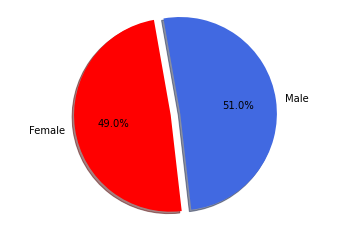

In [26]:
genders = list(gender_data.index)
gender_count = list(gender_data.values)
colors = ["red", "royalblue"]
explode = (0.1,0)

plt.pie(gender_count, explode=explode, labels=genders, colors=colors, autopct="%1.1f%%", shadow=True, startangle=100)

plt.axis("equal")
plt.show

## Quartiles, Outliers and Boxplots

In [27]:
joint_path_clean[joint_path_clean['Mouse ID'] == 'a203']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
112,a203,0,45.000000,0,Infubinol,Female,20,23
385,a203,5,48.508468,0,Infubinol,Female,20,23
594,a203,10,51.852437,1,Infubinol,Female,20,23
752,a203,15,52.777870,1,Infubinol,Female,20,23
1009,a203,20,55.173336,1,Infubinol,Female,20,23
1284,a203,25,56.793208,1,Infubinol,Female,20,23
1304,a203,30,59.523197,1,Infubinol,Female,20,23
1565,a203,35,61.931650,2,Infubinol,Female,20,23
1662,a203,40,63.593490,2,Infubinol,Female,20,23
1791,a203,45,67.973419,2,Infubinol,Female,20,23


In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
tumor_df = joint_path_clean.groupby("Mouse ID").max()


camp = tumor_df.loc[tumor_df['Drug Regimen'] == 'Capomulin',"Tumor Volume (mm3)"]
ram = tumor_df.loc[tumor_df['Drug Regimen'] == 'Ramicane',"Tumor Volume (mm3)"]
infu = tumor_df.loc[tumor_df['Drug Regimen'] == 'Infubinol',"Tumor Volume (mm3)"]
ceft = tumor_df.loc[tumor_df['Drug Regimen'] == 'Ceftamin',"Tumor Volume (mm3)"]


camp

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#MatPlotLib Quarters
quartiles = camp.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) for Capomulin is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3)  for Capomulin is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3)  for Capomulin is: {iqr}")
print(f"The the median of Tumor Volume (mm3)  for Capomulin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers for Capomulin.")
print(f"Values above {upper_bound} could be outliers for Capomulin.")



The lower quartile of Tumor Volume (mm3) for Capomulin is: 45.0
The upper quartile of Tumor Volume (mm3)  for Capomulin is: 46.74900552
The interquartile range of Tumor Volume (mm3)  for Capomulin is: 1.7490055199999972
The the median of Tumor Volume (mm3)  for Capomulin is: 45.89372032 
Values below 42.376491720000004 could be outliers for Capomulin.
Values above 49.37251379999999 could be outliers for Capomulin.


In [35]:
quartiles = infu.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) for Infubinol is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3)  for Infubinol is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3)  for Infubinol is: {iqr}")
print(f"The the median of Tumor Volume (mm3)  for Infubinol is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers for Infubinol.")
print(f"Values above {upper_bound} could be outliers for Infubinol.")

The lower quartile of Tumor Volume (mm3) for Infubinol is: 54.04860769
The upper quartile of Tumor Volume (mm3)  for Infubinol is: 65.52574285
The interquartile range of Tumor Volume (mm3)  for Infubinol is: 11.477135160000003
The the median of Tumor Volume (mm3)  for Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers for Infubinol.
Values above 82.74144559000001 could be outliers for Infubinol.


In [ ]:
quartiles = ram.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) for Ramicane is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3)  for Ramicane is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3)  for Ramicane is: {iqr}")
print(f"The the median of Tumor Volume (mm3)  for Ramicane is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers for Ramicane.")
print(f"Values above {upper_bound} could be outliers for Ramicane.")

In [36]:
quartiles = ceft.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) for Ceftamin is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3)  for Ceftamin is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3)  for Ceftamin is: {iqr}")
print(f"The the median of Tumor Volume (mm3)  for Ceftamin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers for Ceftamin.")
print(f"Values above {upper_bound} could be outliers for Ceftamin.")

The lower quartile of Tumor Volume (mm3) for Ceftamin is: 48.72207785
The upper quartile of Tumor Volume (mm3)  for Ceftamin is: 64.29983003
The interquartile range of Tumor Volume (mm3)  for Ceftamin is: 15.577752179999997
The the median of Tumor Volume (mm3)  for Ceftamin is: 59.85195552 
Values below 25.355449580000002 could be outliers for Ceftamin.
Values above 87.66645829999999 could be outliers for Ceftamin.


In [29]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

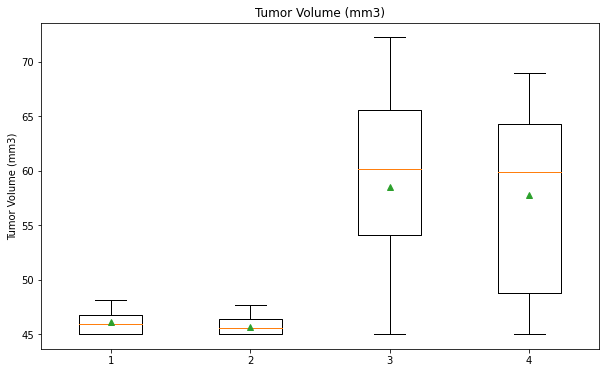

In [30]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.figure(figsize=(10,6))
plt.boxplot([camp, ram, infu, ceft], showmeans=True)
plt.title('Tumor Volume (mm3)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [38]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_mouse = joint_path_clean.loc[joint_path_clean["Mouse ID"] == "b128"]
cap_mouse


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
468,b128,5,45.651331,0,Capomulin,Female,9,22
674,b128,10,43.270852,0,Capomulin,Female,9,22
713,b128,15,43.784893,0,Capomulin,Female,9,22
925,b128,20,42.731552,0,Capomulin,Female,9,22
1257,b128,25,43.262145,1,Capomulin,Female,9,22
1388,b128,30,40.605335,1,Capomulin,Female,9,22
1535,b128,35,37.967644,1,Capomulin,Female,9,22
1616,b128,40,38.379726,2,Capomulin,Female,9,22
1751,b128,45,38.982878,2,Capomulin,Female,9,22


<Figure size 720x432 with 0 Axes>

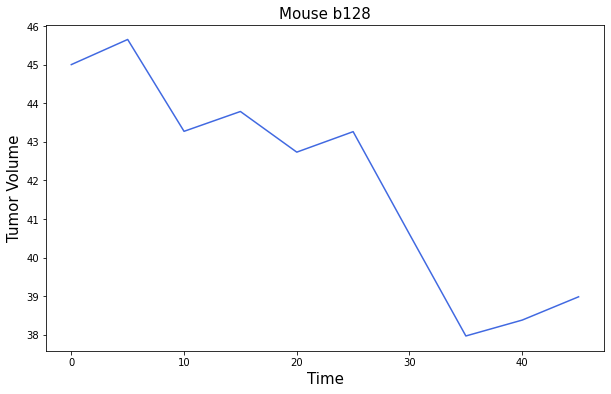

In [40]:
plt.figure(figsize=(10,6))


x = cap_mouse.Timepoint
y = cap_mouse["Tumor Volume (mm3)"]

plt.figure(figsize=(10,6))
plt.plot(x, y, color="royalblue")

plt.title("Mouse b128", fontsize = 15, fontname = "Apple Braille")
plt.xlabel("Time", fontsize = 15, fontname = "Apple Braille")
plt.ylabel("Tumor Volume", fontsize = 15, fontname = "Apple Braille" )

plt.show()

In [48]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight_df = joint_path_clean.loc[joint_path_clean["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Weight (g)", "Tumor Volume (mm3)"].mean().reset_index()

<ipython-input-48-93da1f0e8c10>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  weight_df = joint_path_clean.loc[joint_path_clean["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")["Weight (g)", "Tumor Volume (mm3)"].mean().reset_index()


Text(0, 0.5, 'Tumor Size (mm3)')

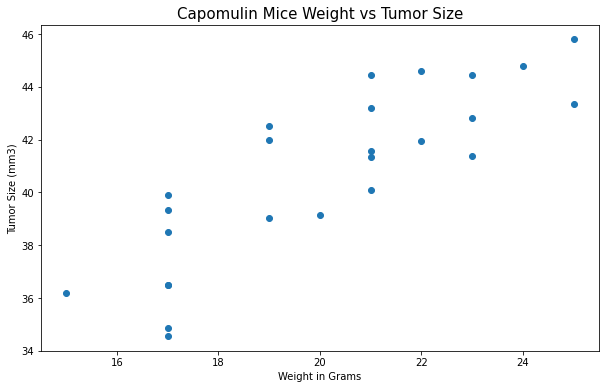

In [51]:
plt.figure(figsize=(10,6))
plt.scatter(weight_df["Weight (g)"], weight_df["Tumor Volume (mm3)"])
plt.title("Capomulin Mice Weight vs Tumor Size", fontsize = 15, fontname = "Apple Braille")
plt.xlabel("Weight in Grams")
plt.ylabel("Tumor Size (mm3)")

## Correlation and Regression

In [55]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

weight_df.corr()

,Weight (g),Tumor Volume (mm3)
Weight (g),1.000000,0.841936
Tumor Volume (mm3),0.841936,1.000000


In [53]:
st.pearsonr(weight_df["Weight (g)"], weight_df["Tumor Volume (mm3)"])

(0.8419363424694717, 1.322572243471279e-07)

y = 0.95x + 21.55


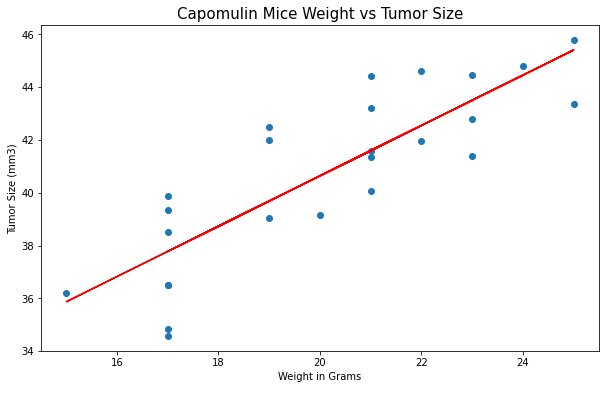

In [56]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight_df["Weight (g)"], weight_df["Tumor Volume (mm3)"])
regress_values = weight_df["Weight (g)"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

plt.figure(figsize=(10,6))

plt.scatter(weight_df["Weight (g)"], weight_df["Tumor Volume (mm3)"])
plt.title("Capomulin Mice Weight vs Tumor Size", fontsize = 15, fontname = "Apple Braille")
plt.xlabel("Weight in Grams")
plt.ylabel("Tumor Size (mm3)")



plt.plot(weight_df["Weight (g)"], regress_values, "r-")
plt.annotate(line_eq, (20,32),fontsize=15,color="red")
plt.show()